In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("ticks")
%matplotlib inline

In [2]:
anemia_balanced_pres = pd.read_csv('../data/clean/anemia_gen_notclean.csv', index_col=False)
anemia_balanced_pres.head()

,AFILIACI,AGEB,ALTITUD,ANEMIA,AREA,CODE_UPM,EDAD,EDADDIAS,EDOFISIO,ENTIDAD,...,MUNICI,NOM_ENT,NOM_LOC,NOM_MUN,NSEDECIL,NSEQUINT,NSETERCI,PONDEF,REGION,SEXO
0,1,0579,1110.0,0.0,1,M0504,6.023271,2200.0,NaN,5,...,9,Coahuila de Zaragoza,Francisco I. Madero (Chávez),Francisco I. Madero,10,5,3,691.751,1,1
1,6,0791,1143.0,0.0,2,M1031,9.472963,3460.0,NaN,10,...,12,Durango,La Luz,Lerdo,3,2,1,483.023,1,1
2,6,0766,8.0,0.0,2,M3007,6.143737,2244.0,NaN,30,...,45,Veracruz de Ignacio de la Llave,San Francisco (Oyozontle),Cosamaloapan de Carpio,5,3,2,3382.137,4,1
3,6,0100,2022.0,0.0,2,M1138,11.258042,4112.0,NaN,11,...,29,Guanajuato,El Peñón,San Diego de la Unión,8,4,3,546.402,2,1
4,6,2918,8.0,1.0,1,M0209,8.605065,3143.0,NaN,2,...,2,Baja California,Mexicali,Mexicali,2,1,1,1472.148,1,1


In [3]:
anemia_balanced_pres.tail()

,AFILIACI,AGEB,ALTITUD,ANEMIA,AREA,CODE_UPM,EDAD,EDADDIAS,EDOFISIO,ENTIDAD,...,MUNICI,NOM_ENT,NOM_LOC,NOM_MUN,NSEDECIL,NSEQUINT,NSETERCI,PONDEF,REGION,SEXO
35381,1,94,2206.0,0.0,1,M3248,17.100616,6246.0,0.0,32,...,57,Zacatecas,Trancoso,Trancoso,7,4,3,604.703,2,2
35382,1,94,2206.0,0.0,1,M3248,12.038329,4397.0,NaN,32,...,57,Zacatecas,Trancoso,Trancoso,5,3,2,1630.350,2,1
35383,0,94,2206.0,0.0,1,M3248,19.690622,7192.0,0.0,32,...,57,Zacatecas,Trancoso,Trancoso,7,4,3,1515.125,2,2
35384,6,94,2206.0,0.0,1,M3248,12.306639,4495.0,0.0,32,...,57,Zacatecas,Trancoso,Trancoso,1,1,1,597.272,2,2
35385,6,94,2206.0,0.0,1,M3248,18.743326,6846.0,NaN,32,...,57,Zacatecas,Trancoso,Trancoso,7,4,3,1472.489,2,1


In [4]:
drop_columns = ['FOLIO_C',  'NOM_ENT',  'NOM_MUN', 'NOM_LOC', 
                'FECHA_NA', 'FECHA_VI', 'EST_DIS', 'NSEDECIL',
                'NSEQUINT', 'NSETERCI', 'HEMCAP',  'EDOFISIO',
                'EDAD',     'MESES',    'EST_VAR', 'HBAJUSTA', 
                'CODE_UPM', 'AGEB']
anemia_balanced_pres = anemia_balanced_pres.drop(drop_columns, axis=1)

In [5]:
anemia_balanced_pres.head()

,AFILIACI,ALTITUD,ANEMIA,AREA,EDADDIAS,ENTIDAD,EST_MARG,EST_URB,HB,INDICEF,INTP,LOCALI,MUNICI,PONDEF,REGION,SEXO
0,1,1110.0,0.0,1,2200.0,5,1.0,2.0,13.2,2.720344,5,1,9,691.751,1,1
1,6,1143.0,0.0,2,3460.0,10,1.0,1.0,12.4,-1.239996,4,24,12,483.023,1,1
2,6,8.0,0.0,2,2244.0,30,1.0,1.0,14.5,-0.253491,5,26,45,3382.137,4,1
3,6,2022.0,0.0,2,4112.0,11,2.0,1.0,13.8,1.349320,2,157,29,546.402,2,1
4,6,8.0,1.0,1,3143.0,2,1.0,3.0,9.3,-1.930640,3,1,2,1472.148,1,1


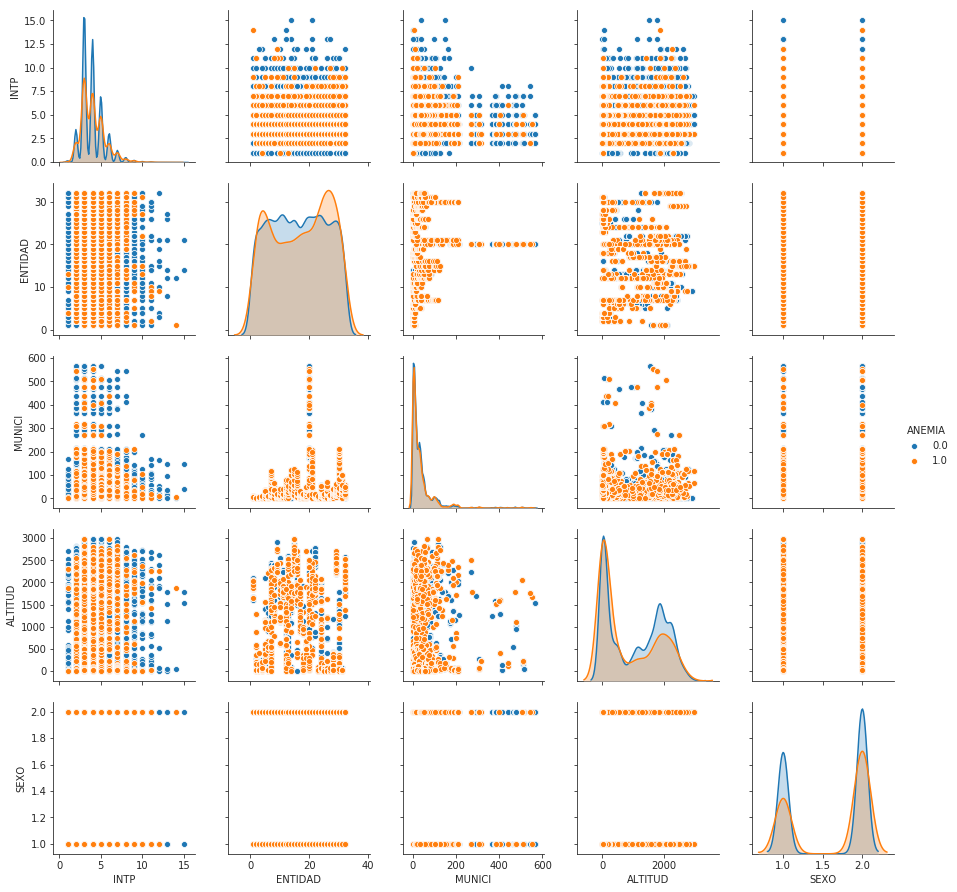

In [6]:
sns.pairplot(anemia_balanced_pres, hue='ANEMIA', vars=['INTP', 'ENTIDAD',  'MUNICI', 'ALTITUD', 'SEXO'])

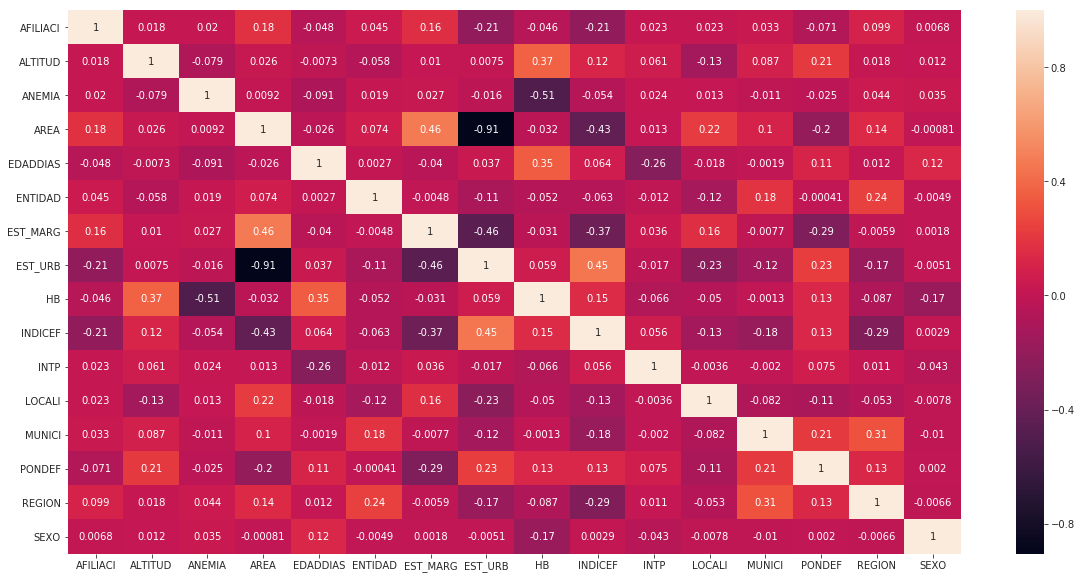

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(anemia_balanced_pres.corr(), annot=True)

# Feature Selection 

In [8]:
#Correlation with output variable
cor_target = abs(anemia_balanced_pres["ANEMIA"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.head()

4     1.0
19    1.0
44    1.0
50    1.0
52    1.0
Name: ANEMIA, dtype: float64

In [9]:
anemia_balanced_pres.to_csv('../data/clean/anemia_balanced_clean.csv', index=False)
anemia_balanced_pres.head()

,AFILIACI,ALTITUD,ANEMIA,AREA,EDADDIAS,ENTIDAD,EST_MARG,EST_URB,HB,INDICEF,INTP,LOCALI,MUNICI,PONDEF,REGION,SEXO
0,1,1110.0,0.0,1,2200.0,5,1.0,2.0,13.2,2.720344,5,1,9,691.751,1,1
1,6,1143.0,0.0,2,3460.0,10,1.0,1.0,12.4,-1.239996,4,24,12,483.023,1,1
2,6,8.0,0.0,2,2244.0,30,1.0,1.0,14.5,-0.253491,5,26,45,3382.137,4,1
3,6,2022.0,0.0,2,4112.0,11,2.0,1.0,13.8,1.349320,2,157,29,546.402,2,1
4,6,8.0,1.0,1,3143.0,2,1.0,3.0,9.3,-1.930640,3,1,2,1472.148,1,1


In [10]:
anemia_balanced_pres.dtypes

AFILIACI      int64
ALTITUD     float64
ANEMIA      float64
AREA          int64
EDADDIAS    float64
ENTIDAD       int64
EST_MARG    float64
EST_URB     float64
HB          float64
INDICEF     float64
INTP          int64
LOCALI        int64
MUNICI        int64
PONDEF      float64
REGION        int64
SEXO          int64
dtype: object

In [21]:
anemia_balanced_pres = anemia_balanced_pres[pd.notnull(anemia_balanced_pres['ANEMIA'])]
anemia_balanced_pres.isnull().mean()
anemia_balanced_pres.shape
anemia_balanced_pres.to_csv('../data/clean/test_full.csv', index=False)

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x_values = anemia_balanced_pres.drop(columns=["ANEMIA"])
y_values = anemia_balanced_pres["ANEMIA"]
# feature ex_valuestraction
fit = SelectKBest(score_func=f_classif, k=4).fit(x_values, y_values)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x_values)
# summarize selected features
print(features[0:5,:])

[  1.278e+01   1.967e+02   2.668e+00   2.643e+02   1.093e+01   2.320e+01
   7.722e+00   1.080e+04   9.028e+01   1.769e+01   5.525e+00   3.602e+00
   1.930e+01   5.987e+01   3.800e+01]
[[  1.110e+03   2.200e+03   1.320e+01   2.720e+00]
 [  1.143e+03   3.460e+03   1.240e+01  -1.240e+00]
 [  8.000e+00   2.244e+03   1.450e+01  -2.535e-01]
 [  2.022e+03   4.112e+03   1.380e+01   1.349e+00]
 [  8.000e+00   3.143e+03   9.300e+00  -1.931e+00]]
